# Decision Tree

Decision Tree is a Supervised learning technique that mostly it is preferred for solving Classification problems. It is a tree-structured classifier,
where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

# Import libraries

In [76]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns # Data Visualization

In [77]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Software Engineer,1,22000
1,Sr. Software Engineer,2,24000
2,Technology Lead,3,30000
3,Team Leader,4,38000
4,Manager,5,50000


# Exploratory data analysis

In [78]:
dataset.shape

(10, 3)

In [79]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,125900.000000
std,3.02765,146067.298036
min,1.00000,22000.000000
25%,3.25000,32000.000000
50%,5.50000,62500.000000
75%,7.75000,155000.000000
max,10.00000,480000.000000


In [80]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [81]:
dataset.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [82]:
dataset["Position"].value_counts()

Team Leader                 1
Technology Lead             1
Software Engineer           1
Vice President              1
President                   1
Senior Manager              1
Sr. Software Engineer       1
Manager                     1
Associate Vice President    1
CEO                         1
Name: Position, dtype: int64

# Data visualization

In [83]:
corr = dataset.corr()
print(corr)

           Level    Salary
Level   1.000000  0.843558
Salary  0.843558  1.000000


<AxesSubplot:>

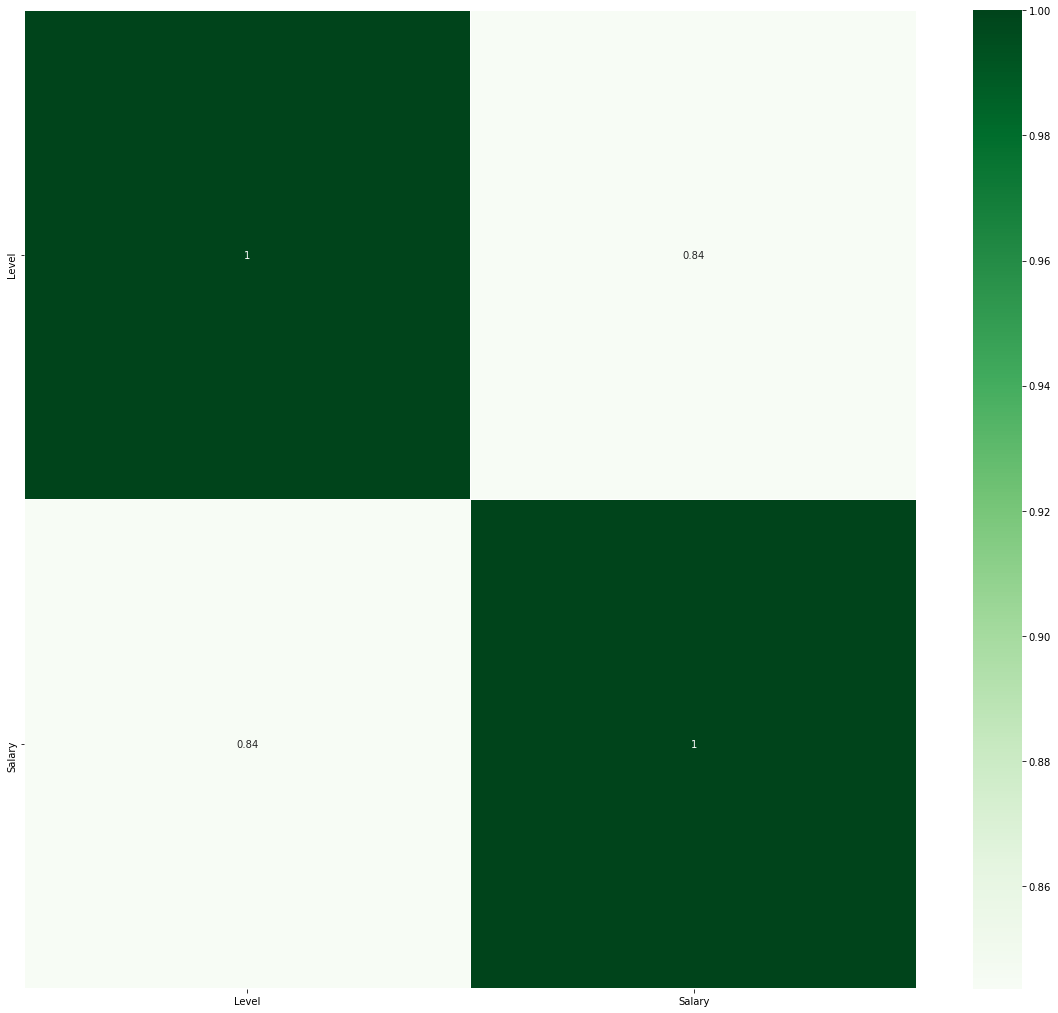

In [84]:
#Visualization of data 
plt.figure(figsize=(20,18))
sns.heatmap(dataset.corr(), annot=True,linewidths=.5, cmap="Greens")

In [85]:
#Catgorical data  
#for position Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder= LabelEncoder()  
dataset["Position"]=label_encoder.fit_transform(dataset["Position"])
dataset.head()

,Position,Level,Salary
0,5,1,22000
1,6,2,24000
2,8,3,30000
3,7,4,38000
4,2,5,50000


In [86]:
X = dataset.iloc[:, [0, 2]].values
y = dataset.iloc[:, 2].values
print(X.shape)
print(y.shape)

(10, 2)
(10,)


# Dataset spliting

In [87]:
# Splitting the dataset into the Training set and Test set
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size = 0.25, random_state = 0)

In [88]:
print('X TRAIN DATA ', X_train.shape)
print('X TEST DATA ', X_test.shape)
print('Y TRAIN DATA ', y_train.shape)
print('Y TEST DATA ', y_test.shape)

X TRAIN DATA  (7, 2)
X TEST DATA  (3, 2)
Y TRAIN DATA  (7,)
Y TEST DATA  (3,)


In [89]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Build the model

In [90]:
# Fitting Decision Tree Classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',
                                    random_state = 0)

classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


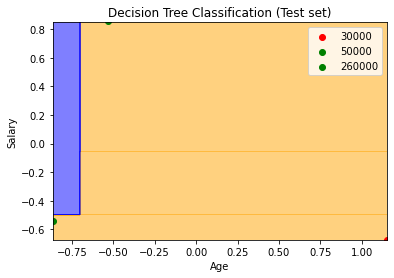

In [91]:
##plotting the graph#####
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

aranged_ages = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()